In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style="ticks")
import gc
import itertools
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 100)
np.random.seed(42)
#import plotly
from datetime import datetime, timedelta
#import plotly.offline as pyoff
#import plotly.graph_objs as go
#initiate visualization library for jupyter notebook 
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#pyoff.init_notebook_mode(connected=True)
%matplotlib inline


In [2]:
# loading data 
reviews_df = pd.read_csv("movies.csv")

In [3]:
reviews_df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 2 columns):
text     45000 non-null object
label    45000 non-null int64
dtypes: int64(1), object(1)
memory usage: 703.2+ KB


In [5]:
reviews_df.columns=['Review', 'Label']

In [6]:
reviews_df.head()

,Review,Label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [7]:
reviews_df['Label'].value_counts()

0    22514
1    22486
Name: Label, dtype: int64

In [8]:
reviews_df['word_count'] = reviews_df['Review'].str.lower().str.split().apply(len)
reviews_df.head()

,Review,Label,word_count
0,I grew up (b. 1965) watching and loving the Th...,0,151
1,"When I put this movie in my DVD player, and sa...",0,326
2,Why do people who do not know what a particula...,0,184
3,Even though I have great interest in Biblical ...,0,69
4,Im a die hard Dads Army fan and nothing will e...,1,178


In [9]:
length_reviews= reviews_df.Review.str.len()

In [10]:
#how long is the longest review

print("The longest review is of words:" ,max(length_reviews))

The longest review is of words: 13704


In [11]:
#how short is the shortest review

print("The shortest review is of words:" ,min(length_reviews))

The shortest review is of words: 32


# Working with TextBlobs 
##### The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. ... Subjectivity is also a float which lies in the range of [0,1]

In [12]:
import textblob
from textblob  import TextBlob

In [13]:
sample_string = 'A very carelessly written film. Poor character and idea development,The silly plot and weak acting by just about the ensemble cast did not help,Seriously, watching this movie will NOT make you smile. It may make you retch.'
print('sample_string', str)

sample_string <class 'str'>


In [14]:
blob_reviews = TextBlob(sample_string)
print(blob_reviews.sentiment)

Sentiment(polarity=-0.2708333333333333, subjectivity=0.5333333333333333)


In [15]:
string_2 = 'Just the ultimate masterpiece in my opinion. Every line, every phrase, every picture is exactly in place and Lindsay Crouse and Joe Mantegna are just THE coolshrink and the sleazy con-man, so well cast. 10 out of 10!'
print('string_2', str)

string_2 <class 'str'>


In [16]:
blob_reviews_2 = TextBlob(string_2)
print(blob_reviews_2.sentiment)

Sentiment(polarity=0.15625, subjectivity=0.625)


# Calculating sentiment for each review

In [17]:
reviews_df['sentiment'] = reviews_df['Review'].apply(lambda Review: TextBlob(Review).sentiment)

In [18]:
reviews_df.head()

,Review,Label,word_count,sentiment
0,I grew up (b. 1965) watching and loving the Th...,0,151,"(0.12328703703703707, 0.6357407407407408)"
1,"When I put this movie in my DVD player, and sa...",0,326,"(0.13134473927156853, 0.47259075612734147)"
2,Why do people who do not know what a particula...,0,184,"(-0.041369047619047625, 0.39812925170068025)"
3,Even though I have great interest in Biblical ...,0,69,"(-0.13571428571428568, 0.6166666666666666)"
4,Im a die hard Dads Army fan and nothing will e...,1,178,"(0.12325566590272473, 0.5910109498344792)"


# Working with WordCloud 

In [19]:
import wordcloud
from wordcloud import WordCloud

In [20]:
#Generating wordcloud from above 2 strings

cloud_sample_string=WordCloud(background_color="white").generate(sample_string)
cloud_sample_string

<function matplotlib.pyplot.show(*args, **kw)>

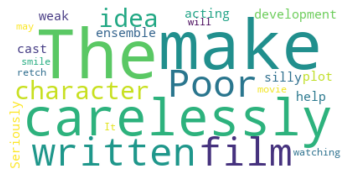

In [21]:
plt.imshow(cloud_sample_string, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [22]:
cloud_string_2=WordCloud(background_color="black").generate(string_2)
cloud_string_2

<function matplotlib.pyplot.show(*args, **kw)>

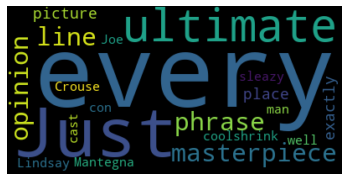

In [23]:
plt.imshow(cloud_string_2, interpolation = 'bilinear')
plt.axis('off')
plt.show

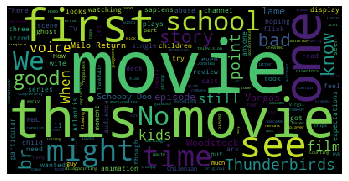

In [24]:
text = reviews_df['Review'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Stopwords

#### Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence

In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
#nltk.download()

In [26]:
test_string= sample_string + string_2 
print(test_string)

A very carelessly written film. Poor character and idea development,The silly plot and weak acting by just about the ensemble cast did not help,Seriously, watching this movie will NOT make you smile. It may make you retch.Just the ultimate masterpiece in my opinion. Every line, every phrase, every picture is exactly in place and Lindsay Crouse and Joe Mantegna are just THE coolshrink and the sleazy con-man, so well cast. 10 out of 10!


In [27]:
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(test_string)

filtered_string = [w for w in word_tokens if not w in stop_words]

filtered_string = []

for w in word_tokens:
    if w not in stop_words:
        filtered_string.append(w)




In [28]:
print(word_tokens)

['A', 'very', 'carelessly', 'written', 'film', '.', 'Poor', 'character', 'and', 'idea', 'development', ',', 'The', 'silly', 'plot', 'and', 'weak', 'acting', 'by', 'just', 'about', 'the', 'ensemble', 'cast', 'did', 'not', 'help', ',', 'Seriously', ',', 'watching', 'this', 'movie', 'will', 'NOT', 'make', 'you', 'smile', '.', 'It', 'may', 'make', 'you', 'retch.Just', 'the', 'ultimate', 'masterpiece', 'in', 'my', 'opinion', '.', 'Every', 'line', ',', 'every', 'phrase', ',', 'every', 'picture', 'is', 'exactly', 'in', 'place', 'and', 'Lindsay', 'Crouse', 'and', 'Joe', 'Mantegna', 'are', 'just', 'THE', 'coolshrink', 'and', 'the', 'sleazy', 'con-man', ',', 'so', 'well', 'cast', '.', '10', 'out', 'of', '10', '!']


In [29]:
print(filtered_string)

['A', 'carelessly', 'written', 'film', '.', 'Poor', 'character', 'idea', 'development', ',', 'The', 'silly', 'plot', 'weak', 'acting', 'ensemble', 'cast', 'help', ',', 'Seriously', ',', 'watching', 'movie', 'NOT', 'make', 'smile', '.', 'It', 'may', 'make', 'retch.Just', 'ultimate', 'masterpiece', 'opinion', '.', 'Every', 'line', ',', 'every', 'phrase', ',', 'every', 'picture', 'exactly', 'place', 'Lindsay', 'Crouse', 'Joe', 'Mantegna', 'THE', 'coolshrink', 'sleazy', 'con-man', ',', 'well', 'cast', '.', '10', '10', '!']


# Bow (BagOfWords)

#### Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
print(test_string)
test_string= [test_string]

A very carelessly written film. Poor character and idea development,The silly plot and weak acting by just about the ensemble cast did not help,Seriously, watching this movie will NOT make you smile. It may make you retch.Just the ultimate masterpiece in my opinion. Every line, every phrase, every picture is exactly in place and Lindsay Crouse and Joe Mantegna are just THE coolshrink and the sleazy con-man, so well cast. 10 out of 10!


In [32]:
#building a vectorizer and fitting it

tstring_vect= CountVectorizer(test_string)
tstring_vect.fit(test_string)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8',
                input=['A very carelessly written film. Poor character and '
                       'idea development,The silly plot and weak acting by '
                       'just about the ensemble cast did not help,Seriously, '
                       'watching this movie will NOT make you smile. It may '
                       'make you retch.Just the ultimate masterpiece in my '
                       'opinion. Every line, every phrase, every picture is '
                       'exactly in place and Lindsay Crouse and Joe Mantegna '
                       'are just THE coolshrink and the sleazy con-man, so '
                       'well cast. 10 out of 10!'],
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_patter

In [33]:
print(tstring_vect.vocabulary_)
print(tstring_vect.get_feature_names())

{'very': 52, 'carelessly': 6, 'written': 57, 'film': 17, 'poor': 42, 'character': 8, 'and': 3, 'idea': 19, 'development': 12, 'the': 49, 'silly': 45, 'plot': 41, 'weak': 54, 'acting': 2, 'by': 5, 'just': 24, 'about': 1, 'ensemble': 14, 'cast': 7, 'did': 13, 'not': 34, 'help': 18, 'seriously': 44, 'watching': 53, 'this': 50, 'movie': 32, 'will': 56, 'make': 27, 'you': 58, 'smile': 47, 'it': 22, 'may': 31, 'retch': 43, 'ultimate': 51, 'masterpiece': 30, 'in': 20, 'my': 33, 'opinion': 36, 'every': 15, 'line': 26, 'phrase': 38, 'picture': 39, 'is': 21, 'exactly': 16, 'place': 40, 'lindsay': 25, 'crouse': 11, 'joe': 23, 'mantegna': 29, 'are': 4, 'coolshrink': 10, 'sleazy': 46, 'con': 9, 'man': 28, 'so': 48, 'well': 55, '10': 0, 'out': 37, 'of': 35}
['10', 'about', 'acting', 'and', 'are', 'by', 'carelessly', 'cast', 'character', 'con', 'coolshrink', 'crouse', 'development', 'did', 'ensemble', 'every', 'exactly', 'film', 'help', 'idea', 'in', 'is', 'it', 'joe', 'just', 'lindsay', 'line', 'mak

In [34]:
#creating the bow representation

tstring_bow = tstring_vect.transform(test_string)

#print BOW results

print(tstring_bow.shape)
print(tstring_bow.toarray())

(1, 59)
[[2 1 1 5 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 1 2 1 1 1 3 1 1 2 1 1 1 1 1 1 2 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 2]]


In [35]:
tstring_bow_df=pd.DataFrame(tstring_bow.toarray(), columns= tstring_vect.get_feature_names())
print(tstring_bow_df)

   10  about  acting  and  are  by  carelessly  cast  character  con  \
0   2      1       1    5    1   1           1     2          1    1   

   coolshrink  crouse  development  did  ensemble  every  exactly  film  help  \
0           1       1            1    1         1      3        1     1     1   

   idea  in  is  it  joe  just  lindsay  line  make  man  mantegna  \
0     1   2   1   1    1     3        1     1     2    1         1   

   masterpiece  may  movie  my  not  of  opinion  out  phrase  picture  place  \
0            1    1      1   1    2   1        1    1       1        1      1   

   plot  poor  retch  seriously  silly  sleazy  smile  so  the  this  \
0     1     1      1          1      1       1      1   1    5     1   

   ultimate  very  watching  weak  well  will  written  you  
0         1     1         1     1     1     1        1    2  


In [36]:
stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

In [37]:
#defining a funnction for cleaning text
import string
import re
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+', txt)
    txt=[ps.stem(word) for word in tokens if word not in stopwords]

    return txt


In [38]:

cv1= CountVectorizer(analyzer=clean_text)

cv_all= cv1.fit_transform(reviews_df['Review'])

In [39]:
print(cv_all.shape)

(45000, 133856)


In [40]:
#taking a sample from our dataset

review_sample = reviews_df.sample(n=10)
print(review_sample)


                                                  Review  Label  word_count  \
37979  Tis is a farly typical Tom and Jerry short-a s...      1          76   
9911   A stupid movie, with a stupid plot. Feels like...      0         123   
43386  And how it made it into production astounds me...      0         150   
13822  "The Secretary" is one of those cheesy, cliche...      0         249   
44810  This film makes Clooney. All his films combine...      1          54   
18495  Chuck Jones's 'Rabbit Seasoning', the second i...      1         238   
25555  Clint Eastwood has definitely produced better ...      1         238   
13316  Recently released on British DVD, this is a go...      1         148   
12929  Great movie. I thought it would never be as go...      1          48   
28374  I love Paul McCartney. He is, in my oppinion, ...      1         104   

                                         sentiment  
37979    (0.24648148148148152, 0.4322222222222222)  
9911   (0.00320512820512

In [41]:
cv2=CountVectorizer(analyzer=clean_text)
X_review_sample=cv2.fit_transform(review_sample['Review'])
print(X_review_sample.shape)

(10, 501)


In [42]:
sample_df=pd.DataFrame(X_review_sample.toarray(), columns=cv2.get_feature_names())
sample_df.head(10)

,,10,15,60,A,As,He,I,IQ,In,It,My,OK,TV,To,US,abbot,abus,across,act,actor,actress,add,afford,afternoon,all,allow,almost,also,alway,america,american,amount,and,anyon,appar,appear,appropri,aris,arrog,ass,astound,attent,audienc,away,back,bad,base,basic,beak,...,transcend,trap,treati,trilog,trio,troubl,true,truli,twist,two,typic,un,unless,unwis,upset,vacationbr,variou,victim,villain,virtual,walk,want,warningit,watch,watcher,water,way,well,whatev,while,white,who,wild,will,without,woman,wonder,wont,word,work,world,wors,worsebr,worst,would,written,year,youll,your,zack
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,2,0,0,1
3,0,0,0,0,0,1,0,6,0,2,0,0,0,3,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,1,1,0,0,0,2,0,0,0,0,1,2,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2,0,3,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,...,0,1,0,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0
6,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,1,7,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


# Stemmer and Lemmatizer
#### Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.Stemming follows an algorithm with steps to perform on the words which makes it faster.

In [43]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize


In [44]:
porter=PorterStemmer()
WNlemmatizer=WordNetLemmatizer()

#tokenizing string_2

tokens=word_tokenize(string_2)
print(tokens)

['Just', 'the', 'ultimate', 'masterpiece', 'in', 'my', 'opinion', '.', 'Every', 'line', ',', 'every', 'phrase', ',', 'every', 'picture', 'is', 'exactly', 'in', 'place', 'and', 'Lindsay', 'Crouse', 'and', 'Joe', 'Mantegna', 'are', 'just', 'THE', 'coolshrink', 'and', 'the', 'sleazy', 'con-man', ',', 'so', 'well', 'cast', '.', '10', 'out', 'of', '10', '!']


In [45]:
import time

#logging the start time
start_time=time.time()

#builidng the stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens]

end_time=time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens)

Time taken for stemming in seconds:  0.004066944122314453
Stemmed tokens:  ['just', 'the', 'ultim', 'masterpiec', 'in', 'my', 'opinion', '.', 'everi', 'line', ',', 'everi', 'phrase', ',', 'everi', 'pictur', 'is', 'exactli', 'in', 'place', 'and', 'lindsay', 'crous', 'and', 'joe', 'mantegna', 'are', 'just', 'the', 'coolshrink', 'and', 'the', 'sleazi', 'con-man', ',', 'so', 'well', 'cast', '.', '10', 'out', 'of', '10', '!']


In [46]:
#logging the start time
start_time=time.time()

#builidng the stemmed list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

end_time=time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('lemmatized tokens: ', lem_tokens)

Time taken for lemmatizing in seconds:  4.338977336883545
lemmatized tokens:  ['Just', 'the', 'ultimate', 'masterpiece', 'in', 'my', 'opinion', '.', 'Every', 'line', ',', 'every', 'phrase', ',', 'every', 'picture', 'is', 'exactly', 'in', 'place', 'and', 'Lindsay', 'Crouse', 'and', 'Joe', 'Mantegna', 'are', 'just', 'THE', 'coolshrink', 'and', 'the', 'sleazy', 'con-man', ',', 'so', 'well', 'cast', '.', '10', 'out', 'of', '10', '!']


# TfidfVectorizer()

#### tf-idf stands for Term frequency-inverse document frequency. It converts a collection of raw documents to a matrix of TF-IDF features

In [47]:
reviews_df.at[501,'Review']
reviews_df.get_value(501,'Review')

'Mmmm, a previous summary says "if you like aliens and predator you will enjoy this film" i could not disagree more, this film pays no respect to its weighty lineage and has reduced two of the best loved sci fi strands to little more than a teen horror slasher movie, it has none of the tension or foreboding present in previous alien or predator movies and there is no discernible lead character, i really did not care about any of the characters and i positively yearned to see the stereotypical cast die as soon as possible in the vain hope something better would replace them, it really takes super human incompetence to have two of the most fearsome creatures ever invented positively fail to make a gripping thrilling movie, only watch this if you want to see how NOT to do it.'

In [48]:
string_501 = reviews_df.get_value(501,'Review')
print(string_501)
string_501 =[string_501]

Mmmm, a previous summary says "if you like aliens and predator you will enjoy this film" i could not disagree more, this film pays no respect to its weighty lineage and has reduced two of the best loved sci fi strands to little more than a teen horror slasher movie, it has none of the tension or foreboding present in previous alien or predator movies and there is no discernible lead character, i really did not care about any of the characters and i positively yearned to see the stereotypical cast die as soon as possible in the vain hope something better would replace them, it really takes super human incompetence to have two of the most fearsome creatures ever invented positively fail to make a gripping thrilling movie, only watch this if you want to see how NOT to do it.


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

#calling the vectorizer and fitting it
string_501_vect= TfidfVectorizer().fit(string_501)

#Creating the tfidf representation
string_501_tfifdf= string_501_vect.transform(string_501)

print(string_501_tfifdf.toarray())

[[0.05913124 0.05913124 0.05913124 0.23652496 0.05913124 0.11826248
  0.05913124 0.05913124 0.05913124 0.05913124 0.05913124 0.05913124
  0.05913124 0.05913124 0.05913124 0.05913124 0.05913124 0.05913124
  0.05913124 0.05913124 0.05913124 0.05913124 0.05913124 0.05913124
  0.11826248 0.05913124 0.05913124 0.11826248 0.05913124 0.05913124
  0.05913124 0.05913124 0.05913124 0.11826248 0.11826248 0.05913124
  0.05913124 0.05913124 0.17739372 0.05913124 0.05913124 0.05913124
  0.05913124 0.05913124 0.05913124 0.05913124 0.05913124 0.11826248
  0.05913124 0.11826248 0.05913124 0.11826248 0.05913124 0.17739372
  0.23652496 0.05913124 0.11826248 0.05913124 0.11826248 0.05913124
  0.11826248 0.05913124 0.11826248 0.11826248 0.05913124 0.05913124
  0.05913124 0.05913124 0.05913124 0.11826248 0.05913124 0.05913124
  0.05913124 0.05913124 0.05913124 0.05913124 0.05913124 0.05913124
  0.05913124 0.05913124 0.05913124 0.35478744 0.05913124 0.05913124
  0.17739372 0.05913124 0.41391868 0.11826248 0.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

#defining a vectorizer and specifying the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'

vect= TfidfVectorizer(ngram_range=(1,2), max_features= 100, token_pattern= my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(string_501)

X_501= vect.transform(string_501)


Y= pd.DataFrame(X_501.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the Dataframe: ', Y.head())

Top 5 rows of the Dataframe:        alien  alien predator    aliens  aliens predator      best  best loved  \
0  0.092057        0.092057  0.092057         0.092057  0.092057    0.092057   

     better  better replace      care  care characters      cast  cast die  \
0  0.092057        0.092057  0.092057         0.092057  0.092057  0.092057   

   character  character really  characters  characters positively  creatures  \
0   0.092057          0.092057    0.092057               0.092057   0.092057   

   creatures invented       did  did care       die  die soon  disagree  \
0            0.092057  0.092057  0.092057  0.092057  0.092057  0.092057   

   disagree film  discernible  discernible lead     enjoy  enjoy film  \
0       0.092057     0.092057          0.092057  0.092057    0.092057   

       fail  fail make  fearsome        fi      film     loved  loved sci  \
0  0.092057   0.092057  0.092057  0.092057  0.184115  0.092057   0.092057   

       make  make gripping      mmmm  

In [51]:
Y.head()

,alien,alien predator,aliens,aliens predator,best,best loved,better,better replace,care,care characters,cast,cast die,character,character really,characters,characters positively,creatures,creatures invented,did,did care,die,die soon,disagree,disagree film,discernible,discernible lead,enjoy,enjoy film,fail,fail make,fearsome,fi,film,loved,loved sci,make,make gripping,mmmm,mmmm previous,movie,movie tension,movie watch,movies,movies discernible,pays,pays respect,positively,positively fail,positively yearned,possible,possible vain,predator,predator enjoy,predator movies,present,present previous,previous,previous alien,previous summary,really,really did,really takes,reduced,reduced best,replace,replace really,respect,respect weighty,says,says like,sci,sci fi,slasher,slasher movie,soon,soon possible,stereotypical,stereotypical cast,strands,strands little,summary,summary says,super,super human,takes,takes super,teen,teen horror,tension,tension foreboding,thrilling,thrilling movie,vain,vain hope,want,watch,watch want,weighty,weighty lineage,yearned
0,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.184115,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.184115,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.184115,0.092057,0.092057,0.092057,0.092057,0.184115,0.092057,0.092057,0.092057,0.092057,0.184115,0.092057,0.092057,0.184115,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057,0.092057


# BOW vs tfidf 

In [52]:
reviews_df.at[16097,'Review']
str_16097=reviews_df.get_value(16097,'Review')
print(str_16097)

str_16097=[str_16097]

Having a close experience with one such patient is probably the best reason why I had my heart rushing throughout the entire film. Intense, sensible, moral and revealing, and don't forget to check out the marvellous sound track. Really good.


In [53]:
#building BOW and tfidf vectorizers
 
vect1= CountVectorizer(max_features=100).fit(str_16097)
vect2= TfidfVectorizer(max_features=100).fit(str_16097)

#transforming

X1= vect1.transform(str_16097)
X2= vect2.transform(str_16097)

X_df1= pd.DataFrame(X1.toarray(), columns= vect1.get_feature_names())
X_df2= pd.DataFrame(X2.toarray(), columns= vect2.get_feature_names())


print('Top 5 rows, using BOW: \n', X_df1.head())
print('Top 5 rows, using tfidf: \n', X_df2.head())

Top 5 rows, using BOW: 
    and  best  check  close  don  entire  experience  film  forget  good  had  \
0    2     1      1      1    1       1           1     1       1     1    1   

   having  heart  intense  is  marvellous  moral  my  one  out  patient  \
0       1      1        1   1           1      1   1    1    1        1   

   probably  really  reason  revealing  rushing  sensible  sound  such  the  \
0         1       1       1          1        1         1      1     1    3   

   throughout  to  track  why  with  
0           1   1      1    1     1  
Top 5 rows, using tfidf: 
         and      best     check     close       don    entire  experience  \
0  0.294884  0.147442  0.147442  0.147442  0.147442  0.147442    0.147442   

       film    forget      good       had    having     heart   intense  \
0  0.147442  0.147442  0.147442  0.147442  0.147442  0.147442  0.147442   

         is  marvellous     moral        my       one       out   patient  \
0  0.147442    0.1

# Logistic Regression

In [54]:
alldata= reviews_df['Review']

alldata_vect=CountVectorizer(max_features=100).fit(alldata)
alldata_vect.fit(alldata)

alldata_bow= alldata_vect.transform(alldata)


In [55]:
alldata_df= pd.DataFrame(alldata_bow.toarray(), columns=alldata_vect.get_feature_names())

In [56]:
alldata_df.head()

,about,after,all,also,an,and,any,are,as,at,bad,be,because,been,br,but,by,can,character,characters,could,do,don,even,film,first,for,from,get,good,great,had,has,have,he,her,him,his,how,if,in,into,is,it,its,just,like,made,make,me,more,most,movie,movies,much,my,no,not,of,on,one,only,or,other,out,people,really,see,she,so,some,story,than,that,the,their,them,then,there,they,think,this,time,to,too,up,very,was,way,we,well,were,what,when,which,who,will,with,would,you
0,0,1,2,0,1,3,0,0,1,1,0,3,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,1,1,5,0,2,1,1,0,0,0,0,1,0,0,0,0,0,1,7,0,0,0,0,1,0,0,0,3,0,1,0,3,0,2,0,0,1,0,0,0,0,2,1,0
1,0,0,0,1,0,7,1,0,3,1,2,3,0,4,4,4,1,0,0,1,1,1,1,0,0,6,3,1,0,3,0,5,1,5,0,0,0,0,0,5,4,0,4,4,1,1,3,0,0,0,1,0,10,0,0,2,0,4,8,2,1,0,4,0,0,0,0,0,0,2,4,2,1,2,20,0,0,0,0,0,0,6,2,5,0,0,1,1,0,1,0,0,0,2,0,3,1,2,1,6
2,1,0,0,0,0,5,0,0,3,0,0,1,0,0,0,0,1,0,0,0,0,3,1,0,2,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,2,2,1,2,0,0,2,0,1,2,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,5,10,0,0,0,0,0,0,3,3,10,1,0,0,2,1,1,0,1,2,0,0,4,0,2,0,2
3,1,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,2,0,4,0,0,0,0,0,0,0,0,1,2,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,7,0,0,0,0,0,0,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,3,0,0,9,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,3,0,3,2,2,0,3,0,0,0,0,0,0,0,0,0,0,0,6,0,2,0,0,1,0,0,0,0,1,0,0,0,0,2,13,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0


In [57]:
from sklearn.linear_model import LogisticRegression

y= reviews_df.Label
print(y)

0        0
1        0
2        0
3        0
4        1
5        0
6        1
7        0
8        1
9        1
10       1
11       0
12       1
13       0
14       0
15       1
16       1
17       0
18       0
19       0
20       1
21       0
22       1
23       0
24       1
25       0
26       1
27       1
28       0
29       1
        ..
44970    0
44971    0
44972    0
44973    1
44974    1
44975    1
44976    1
44977    1
44978    0
44979    0
44980    1
44981    0
44982    1
44983    1
44984    1
44985    0
44986    0
44987    1
44988    0
44989    1
44990    1
44991    1
44992    0
44993    1
44994    1
44995    1
44996    1
44997    0
44998    0
44999    0
Name: Label, Length: 45000, dtype: int64


In [58]:
alldata_df.head()

,about,after,all,also,an,and,any,are,as,at,bad,be,because,been,br,but,by,can,character,characters,could,do,don,even,film,first,for,from,get,good,great,had,has,have,he,her,him,his,how,if,in,into,is,it,its,just,like,made,make,me,more,most,movie,movies,much,my,no,not,of,on,one,only,or,other,out,people,really,see,she,so,some,story,than,that,the,their,them,then,there,they,think,this,time,to,too,up,very,was,way,we,well,were,what,when,which,who,will,with,would,you
0,0,1,2,0,1,3,0,0,1,1,0,3,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,1,1,5,0,2,1,1,0,0,0,0,1,0,0,0,0,0,1,7,0,0,0,0,1,0,0,0,3,0,1,0,3,0,2,0,0,1,0,0,0,0,2,1,0
1,0,0,0,1,0,7,1,0,3,1,2,3,0,4,4,4,1,0,0,1,1,1,1,0,0,6,3,1,0,3,0,5,1,5,0,0,0,0,0,5,4,0,4,4,1,1,3,0,0,0,1,0,10,0,0,2,0,4,8,2,1,0,4,0,0,0,0,0,0,2,4,2,1,2,20,0,0,0,0,0,0,6,2,5,0,0,1,1,0,1,0,0,0,2,0,3,1,2,1,6
2,1,0,0,0,0,5,0,0,3,0,0,1,0,0,0,0,1,0,0,0,0,3,1,0,2,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,2,2,1,2,0,0,2,0,1,2,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,5,10,0,0,0,0,0,0,3,3,10,1,0,0,2,1,1,0,1,2,0,0,4,0,2,0,2
3,1,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,2,0,4,0,0,0,0,0,0,0,0,1,2,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,7,0,0,0,0,0,0,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,3,0,0,9,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,3,0,3,2,2,0,3,0,0,0,0,0,0,0,0,0,0,0,6,0,2,0,0,1,0,0,0,0,1,0,0,0,0,2,13,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0


In [59]:
log_reg= LogisticRegression().fit(alldata_df,y)
print('Accuracy of logistic regression is: ', log_reg.score(alldata_df,y))

Accuracy of logistic regression is:  0.735


In [60]:
#another way

from sklearn.metrics import accuracy_score
y_predict=log_reg.predict(alldata_df)
print('Accuracy of logistic regression: ', accuracy_score(y, y_predict))

Accuracy of logistic regression:  0.735


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(alldata_df, y, test_size=0.2, random_state=42)

In [62]:
# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))


Accuracy on train set:  0.7358055555555556
Accuracy on test set:  0.7352222222222222


In [63]:
from sklearn.metrics import confusion_matrix
y_predicted=log_reg.predict(X_test)
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7352222222222222
Confusion matrix test set: 
 [[0.35844444 0.13844444]
 [0.12633333 0.37677778]]


In [64]:
# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]
print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [0.33360805 0.54766667 0.84399481 0.38929723 0.48892326 0.18943694
 0.47065188 0.14532524 0.04817795 0.52296256]
First 10 predicted probabilities of class 1:  [0.66639195 0.45233333 0.15600519 0.61070277 0.51107674 0.81056306
 0.52934812 0.85467476 0.95182205 0.47703744]


# Logistic regression with regularization


In [65]:
X_train, X_test, y_train, y_test = train_test_split(alldata_df, y, test_size=0.3, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.7360740740740741
Accuracy of model 2:  0.734
